In [1]:
import sys, os
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
%matplotlib inline

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on 
%pycodestyle_off

In [26]:
# !pip install advent-of-code-data
# https://github.com/wimglenn/advent-of-code-data #for input parsing/loading
from aocd import get_data  # simple, #get_data(day=24, year=2021)
from aocd.models import Puzzle
puzzle = Puzzle(year=2022, day=9) # picks the current day automatically

In [48]:
#  run ONCE
import datetime
today = datetime.datetime.now().day
puzzle = Puzzle(year=2022, day=today)
#print(puzzle.user)
print(puzzle.input_data_fname[60:])
print(puzzle.example_input_data_fname[60:])


iA = puzzle.input_data
iE = puzzle.example_data
print(iE)
try:
    print(puzzle.easter_egg)
except:
    pass

2022_09_input.txt
2022_09_example_input.txt
R 4
U 4
L 3
D 1
R 4
D 1
L 5
R 2


In [59]:
i = iA

def parse(i=None):
    #directionstart=i.split('\n')
    lines =i.split('\n')
    dir_ =[]
    qtt_=[]
    for line in lines:
        #print(lines)
        direction= line[0]
        qtt = int(line[2::])
        dir_.append(direction)
        qtt_.append(qtt)

    #print(dir_)
    #print(qtt_)

    do_ =''
    for (d,n) in zip(dir_,qtt_):
        do_+= d*n
    #print(do_)
    return do_
do_ = parse(iE)

In [80]:
# test and solve part A
# iA,iE,

tail_pos_outbound = [(2,2),(2,1),(2,0),(2,-1),(2,-2),(1,-2),(0,-2),(-1,-2),(-2,-2),(-2,-1),(-2,0),(-2,1),(-2,2),(-1,2),(0,2),(1,2)]
next_tail_pos =    [(1,1),(1,0),(1,0),(1,0),(1,-1),(0,-1),(0,-1),(-0,-1),(-1,-1),(-1,-0),(-1,0),(-1,0),(-1,1),(-0,1),(0,1),(0,1)]

rel_tail_move = dict(zip(tail_pos_outbound,next_tail_pos))
#print(rel_tail_move[(2,2)])
#print(rel_tail_move[(1,2)])
#print(rel_tail_move[(2,-2)])
#print(rel_tail_move[(2,2)])



# abs_move_curr_head


def abs_move_tail(curr_tail_pos, curr_head_pos):
    new_tail_relative=(0,0) 
    
    new_tail_relative = (curr_head_pos[0]-curr_tail_pos[0], curr_head_pos[1]-curr_tail_pos[1])
    if new_tail_relative in tail_pos_outbound:
        new_rel_pos = rel_tail_move[new_tail_relative]

        abs_pos_tail = (curr_head_pos[0]-new_rel_pos[0], curr_head_pos[1]-new_rel_pos[1])
    else:
        abs_pos_tail =curr_tail_pos
        pass

    return abs_pos_tail

curr_H = (0,0)

rel_move_head = dict({'U':(1,0),'D':(-1,0),'L':(0,-1),'R':(0,1)})

abs_move_tail((-2,2),(0,0))


(-1, 1)

In [96]:
def move_all(do_,startpos):
    visited= set({(0,0)})
    visited_list =[]
    curr_head_pos=startpos
    curr_tail_pos=(0,0)
    
    for L in do_:
        
        curr_head_pos = (rel_move_head[L][0]+curr_head_pos[0],rel_move_head[L][1]+curr_head_pos[1])
        curr_tail_pos = abs_move_tail(curr_tail_pos, curr_head_pos)
        visited.add(curr_tail_pos)
        visited_list.append(curr_tail_pos)
    return visited

def move_all_list(do_,startpos):
    visited= set({(0,0)})
    visited_list =[]
    curr_head_pos=startpos
    curr_tail_pos=(0,0)
    
    for L in do_:
        
        curr_head_pos = (rel_move_head[L][0]+curr_head_pos[0],rel_move_head[L][1]+curr_head_pos[1])
        curr_tail_pos = abs_move_tail(curr_tail_pos, curr_head_pos)
        visited.add(curr_tail_pos)
        visited_list.append(curr_tail_pos)
    return visited_list
# i = iE
# a_obj = a(i)
# a_obj.fun()

do_ = parse(iA)
answA = len(move_all(do_,(0,0)))
move_second_chainel = move_all_list(do_,(0,0))
print(answA)
print(len(move_second_chainel))
print(move_second_chainel[0:5])

6030
11544
[(0, 0), (0, -1), (0, -1), (-1, -2), (-1, -2)]


In [89]:
puzzle.answer_a = answA # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit. [Continue to Part Two]


In [103]:


def move_next_in_chain(list_of_moves_prev=None):
    prev_node_moves = list_of_moves_prev
    curr_head_pos=(0,0)
    curr_tail_pos=(0,0)    
    visited=set({})
    visited_list= []
    for move in prev_node_moves:
        curr_head_pos = move
        curr_tail_pos = abs_move_tail(curr_tail_pos, curr_head_pos)
        visited.add(curr_tail_pos)
        visited_list.append(curr_tail_pos)        
    return visited_list

do_ = parse(iA)
answA = len(move_all(do_,(0,0)))

move_second_chainel = move_all_list(do_,(0,0))
visited =move_second_chainel
for i in range(9-1):
    visited = move_next_in_chain(visited)
print(visited[0:5])
answB = len(set(visited))
print(answB)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]
2545


In [ ]:
# test and solve part B, use inputs & test inputs.

In [ ]:
print(answB)

In [104]:
puzzle.answer_b = answB # this submits!

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 9! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [ ]:
# how long must the chain be, so that the end stays at (0,0) pos?
visited =move_second_chainel
i= 1
list_of_nodeposes=[]
while len(set(visited))>1:
    i +=1
    visited = move_next_in_chain(visited)
    #print(len(visited))
    list_of_nodeposes.append(visited)
else:
    print(i)

In [215]:
def convert(list_of_nodeposes,n = 20):
    
    list_oftimeranges=[]
    for i in range(len(list_of_nodeposes[0])): # loop over all nodes!
        timerange = []
        for j in range(len(list_of_nodeposes)): # over all movmement steps! => store all steps for one position together
            timerange.append(list_of_nodeposes[j][i])
      
        list_oftimeranges.append(timerange)
    return(list_oftimeranges)
list_oftimeranges=convert(list_of_nodeposes)

In [205]:
import numpy as np
print(list_oftimeranges[1][0:20])

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


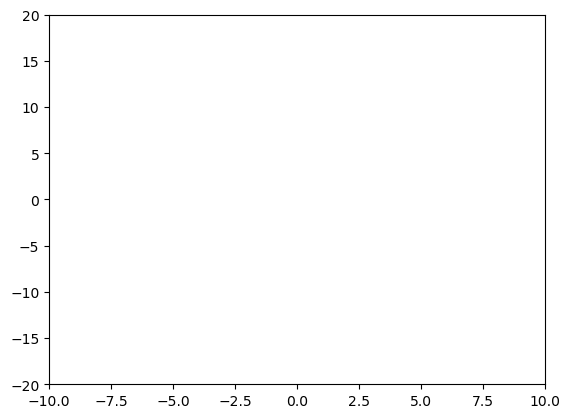

In [231]:
import matplotlib.pyplot as plt
#x = [i for (i,j) in move_second_chainel]
#y = [j for (i,j) in move_second_chainel]
#plt.scatter(x,y,1)
#plt.savefig('HEAD.jpg')

plt.show('off')
n = 20
for a in range(2000):
    if np.mod(a,1)==0:
        x = [i for (i,j) in list_oftimeranges[a]]
        y = [j for (i,j) in list_oftimeranges[a]]
        plt.clf()
        plt.xlim([-10,10])
        plt.ylim([-20,20])
        plt.scatter(x[0],y[0],10,'k')
        plt.plot(x[0:n],y[0:n],1,'-')
    
        plt.savefig('figs_day9/moving_chain_{}.jpg'.format(str(a)))
        
#plt.show()

In [232]:
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save("rope_snake_aoc_day9.gif", format="GIF", append_images=frames,
               save_all=True, duration=10, loop=0)
frame_folder='./figs_day9'
make_gif(frame_folder)